# Metadata inference

In [1]:
%cd ../gendist/experiments
%load_ext autoreload
%autoreload 2

/home/gerardoduran/documents/shift-happens/gendist/experiments


In [2]:
import jax
import optax
import gendist
import torchvision
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import mnist_rotation_meta as metaexp

In [3]:
%config InlineBackend.figure_format = "retina"

In [4]:
configs = np.linspace(0, 2 * jnp.pi, 150) * 180
list_configs = [{"angle": float(deg)} for deg in configs]

In [5]:
key = jax.random.PRNGKey(314)
key_subset, key_train = jax.random.split(key)

In [6]:
n_train_subset = 600
mnist_train = torchvision.datasets.MNIST(root=".", train=True, download=True)
X_train = np.array(mnist_train.data) / 255
X_train = metaexp.configure_covariates(key_subset, metaexp.processing_class, X_train, list_configs, n_train_subset)

In [39]:
alpha = 0.0005
n_epochs = 200
batch_size = 2000

tx = optax.adam(learning_rate=alpha)
lossfn = gendist.training.make_von_mises_loss_func
meta_model = gendist.models.LeNet5Regression(1)

trainer = gendist.training.TrainingMeta(meta_model, lossfn, tx)

In [40]:
meta_output = trainer.fit(key_train, X_train, configs[None, ...], n_epochs, batch_size)

  0%|          | 0/200 [00:00<?, ?it/s]

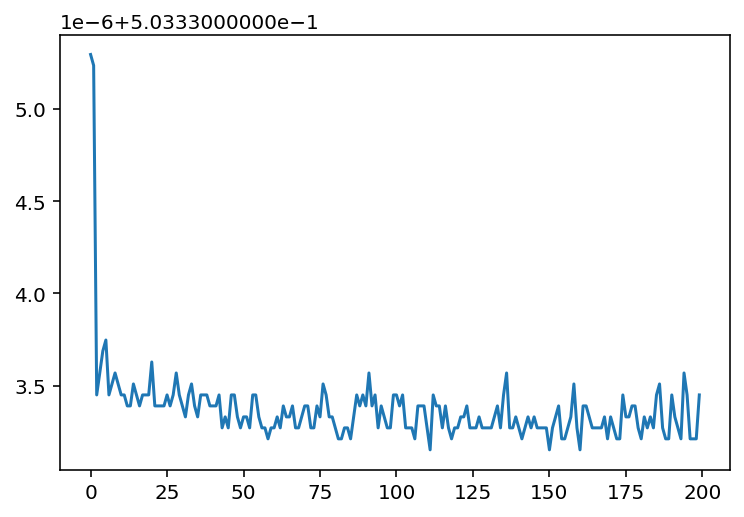

In [41]:
plt.plot(meta_output["losses"])

In [42]:
meta_model.apply(meta_output["params"], X_train.reshape(-1, 28 ** 2)[:100])

DeviceArray([[-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.00130131],
             [-0.001